**SYNC INTERN**

**TASK 3 - Boston House Price Prediction**

**Soumalya Bhattacharyya - Machine Learning Intern**

**Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes (or) features for homes from various suburbs in Boston.**

**Attribute Information(In Order):**
    
    - CRIM      per capita crime rate by town
    - ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS     proportion of non-retail business acres per town
    - CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX       nitric oxides concentration (parts per 10 million)
    - RM        average number of rooms per dwelling
    - AGE       proportion of owner-occupied units built prior to 1940
    - DIS       weighted distances to five Boston employment centers
    - RAD       index of accessibility to radial highways
    - TAX       full-value property-tax rate per $10,000
    
    - PTRATIO   pupil-teacher ratio by town
    - B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT     % lower status of the population
    - MEDV      Median value of owner-occupied homes in $1000's

Data analysis is done on boston house prices dataset.A Linear Regression and SVM Model is created based on the analysis. Accuracy of both the models are also checked and compared.

**Import Modules**

In [1]:
# Importing the libraries 
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

**Loading the Dataset**

In [2]:
# Load the Boston Housing dataset
df = pd.read_csv("boston.csv")

In [3]:
# Display the first few rows of the dataset
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df = pd.DataFrame(df)

In [5]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Summarizing the Stats of the data
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.shape

(506, 14)

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
# Identifying the unique number of values in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [10]:
# Check for Null Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# Finding missing value percentage
display(df.isnull().sum()/len(df) * 100)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [12]:
corr = df.corr()
corr.shape

(14, 14)

**Analyzing The Correlated Features**

In [13]:
# Exploratory Data Analysis
# Correlation
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

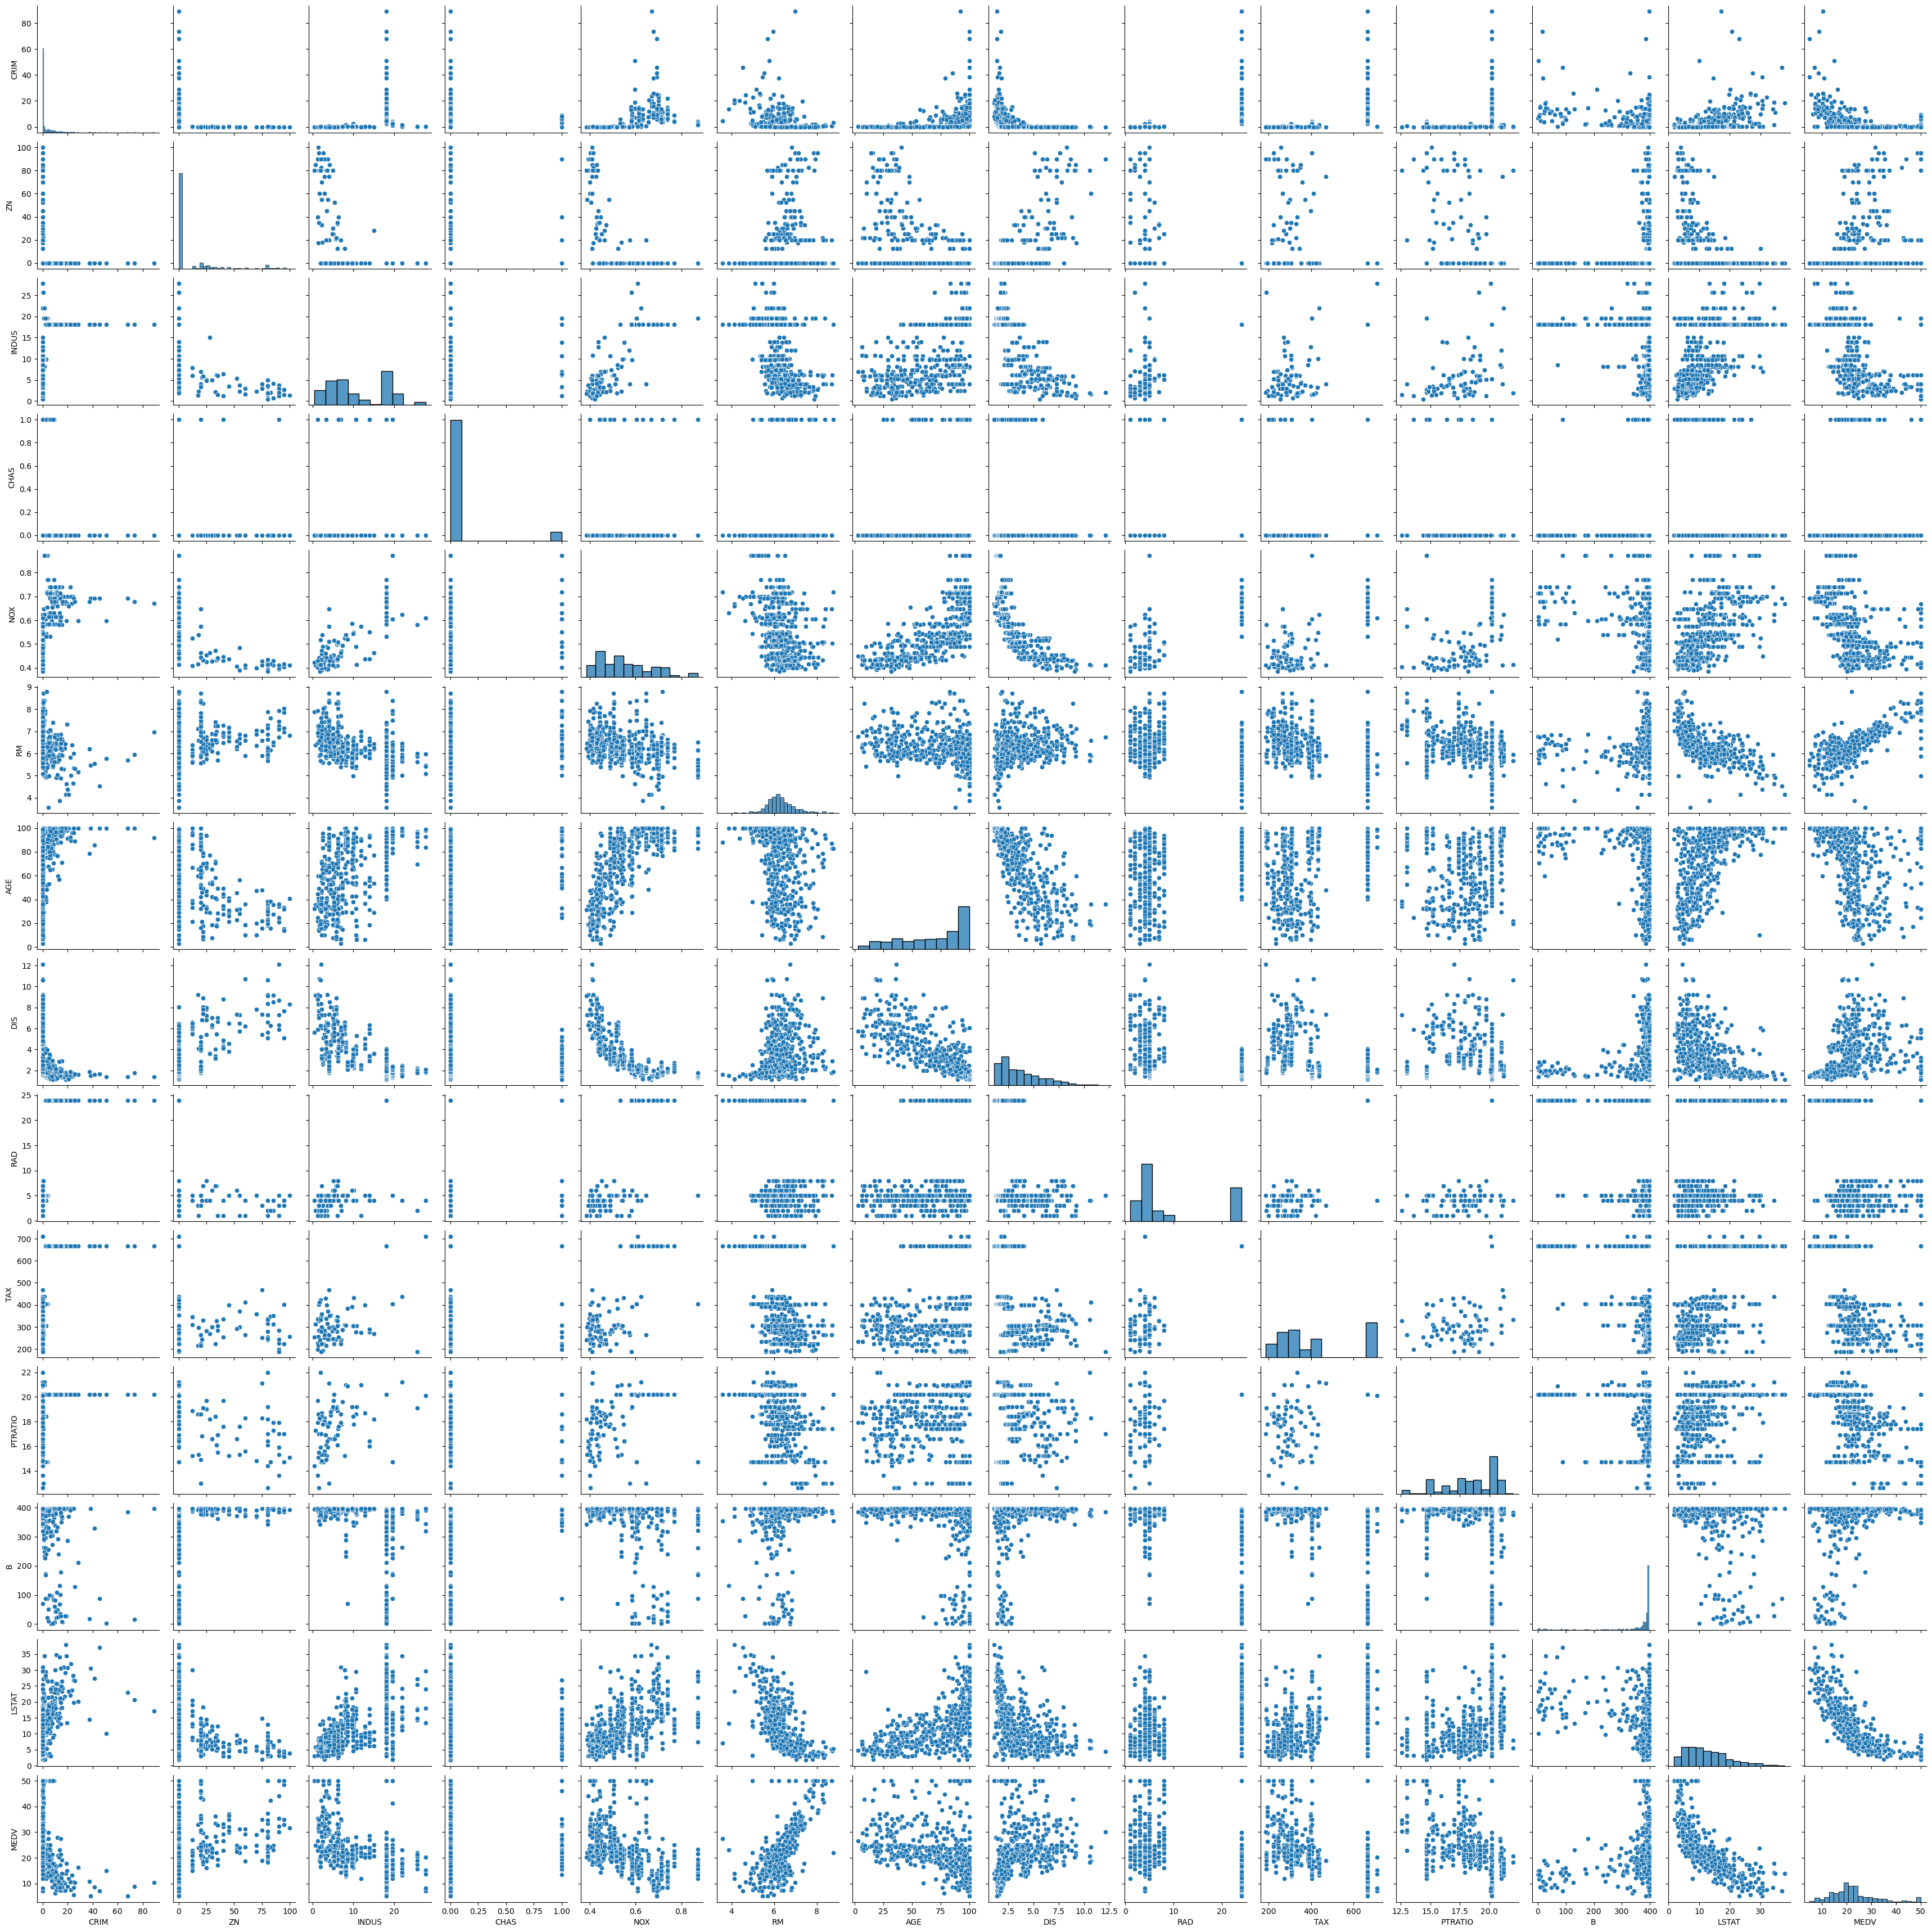

In [14]:
# Now we will check relation between each feature.
sns.pairplot(df)

In [15]:
df_desc = df.describe()
df_desc.loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
Name: mean, dtype: float64

<Axes: >

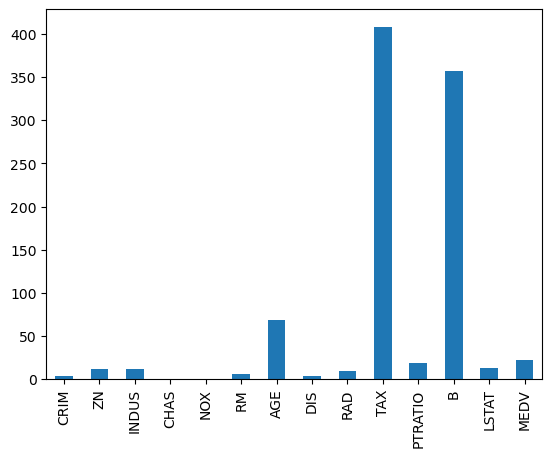

In [16]:
df_desc.loc['mean'].plot.bar()

**Exploratory Data Analysis**

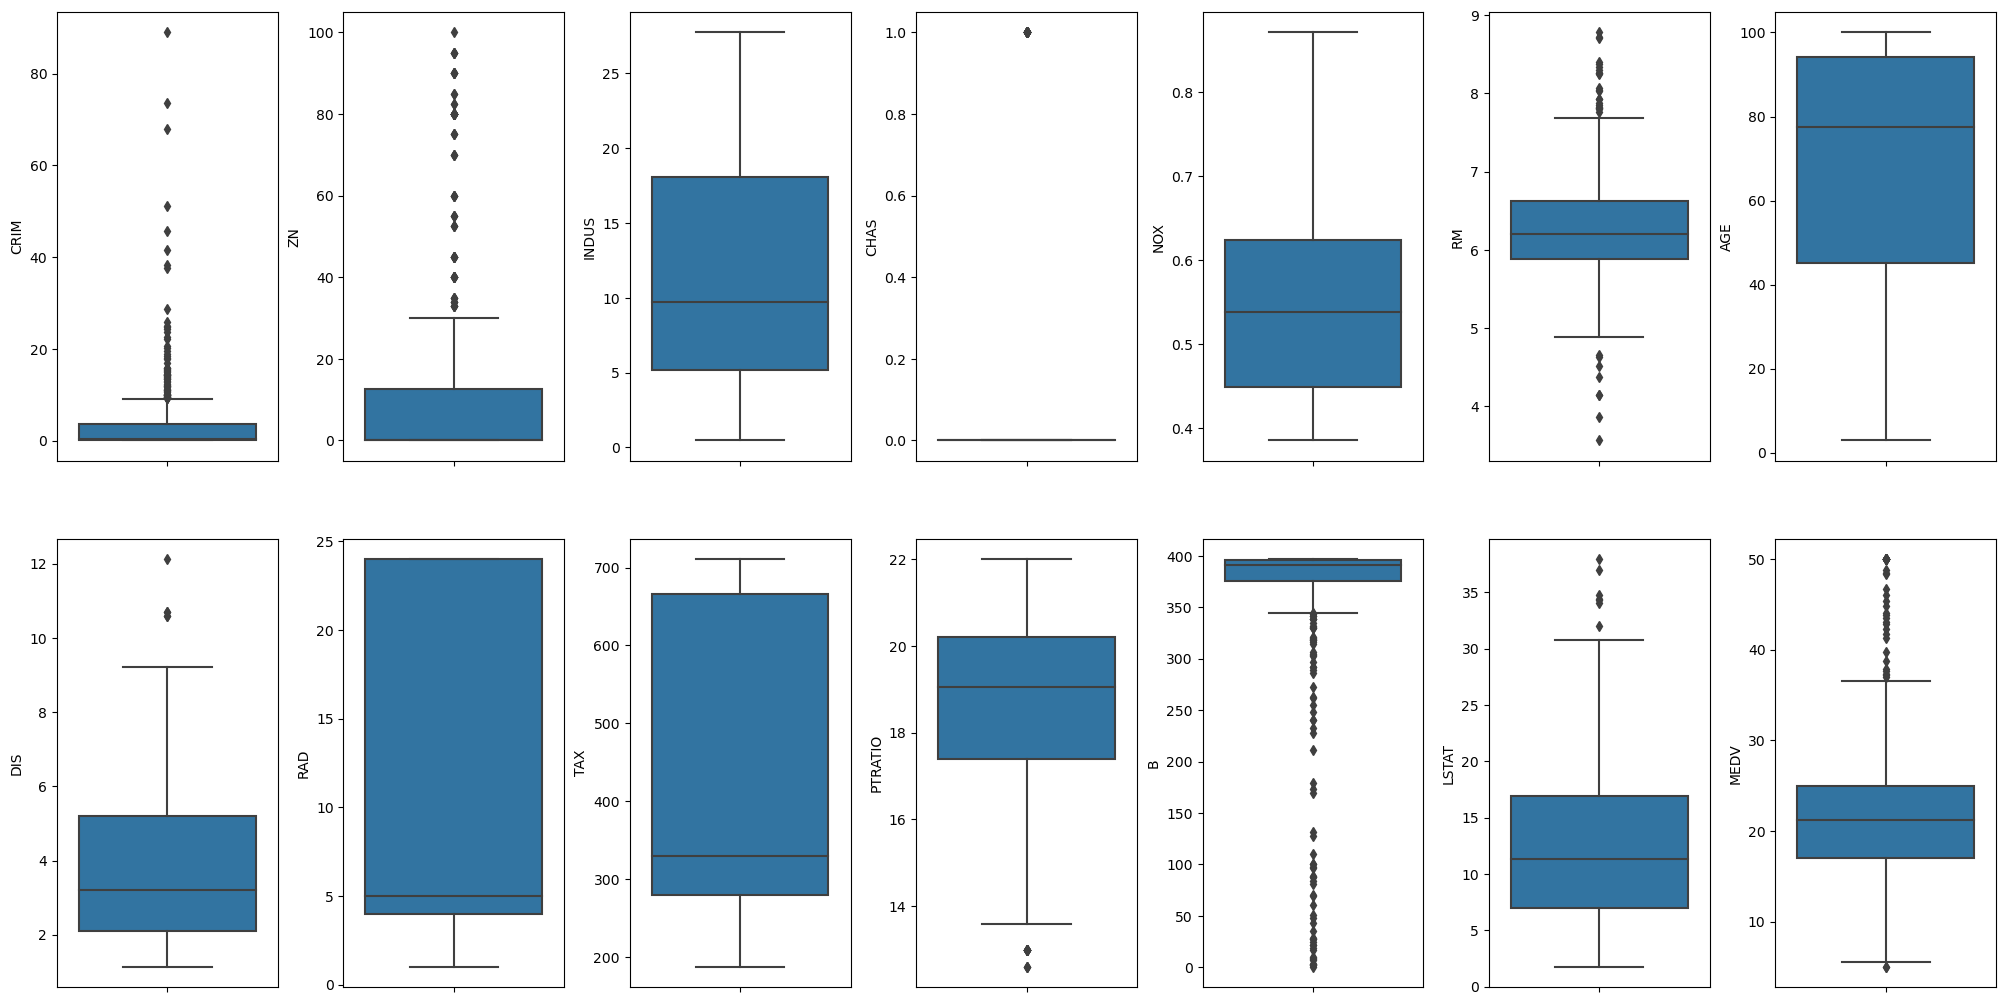

In [17]:
# Create Box Plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

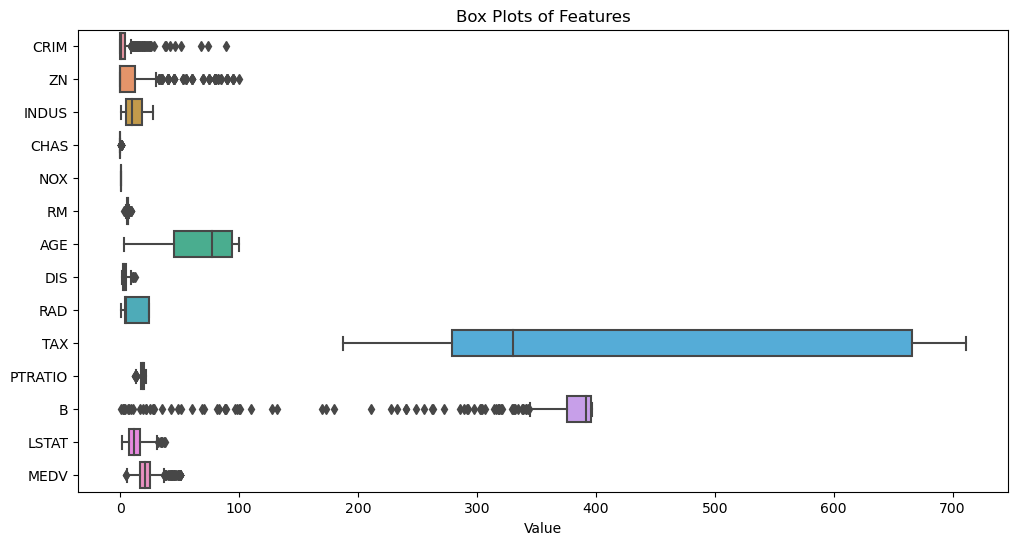

In [18]:
# Visualize the Box plots of each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Features')
plt.xlabel('Value')
plt.show()

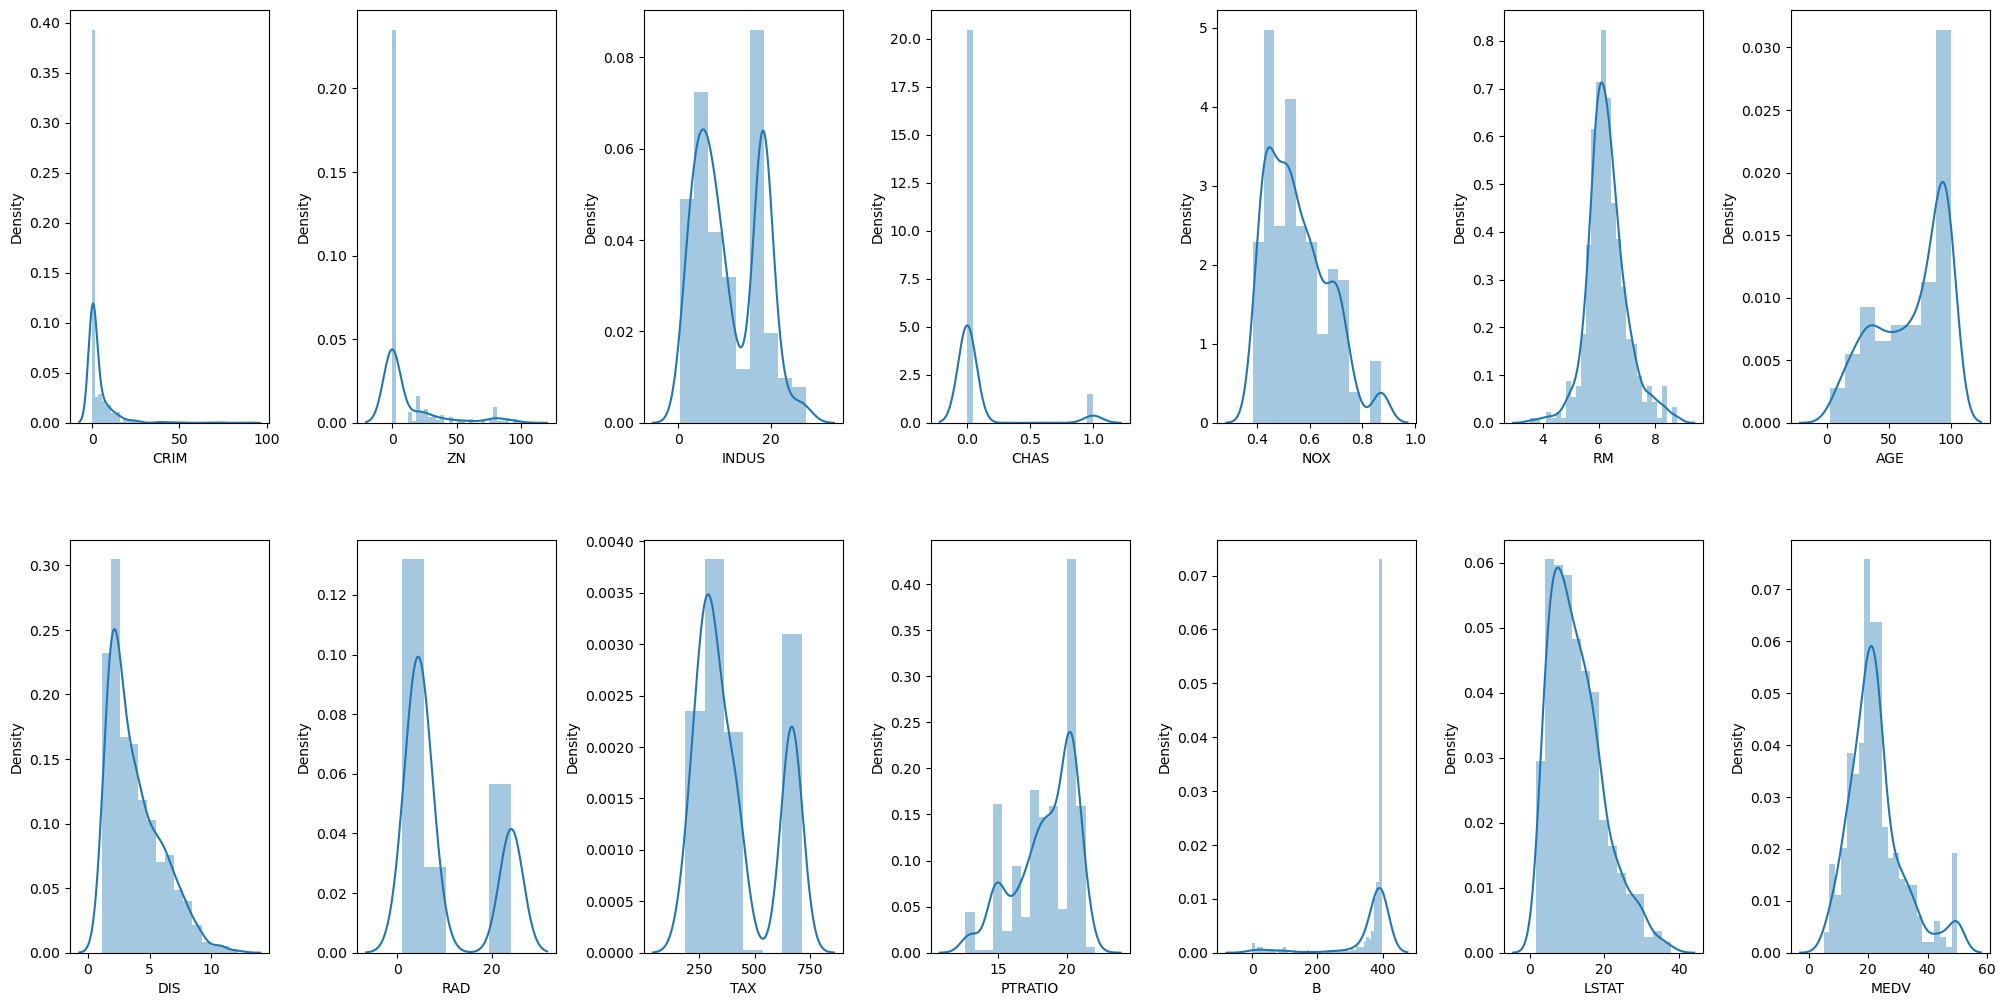

In [19]:
# Create Distribution Plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

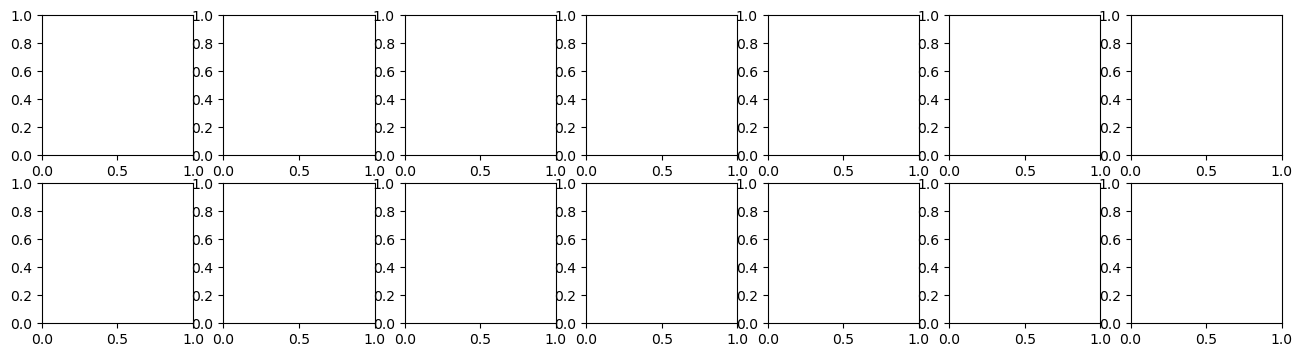

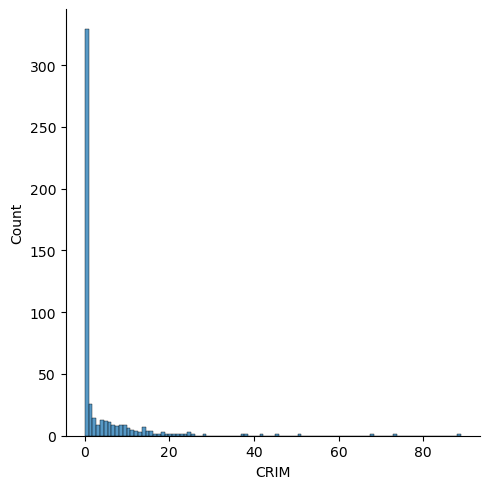

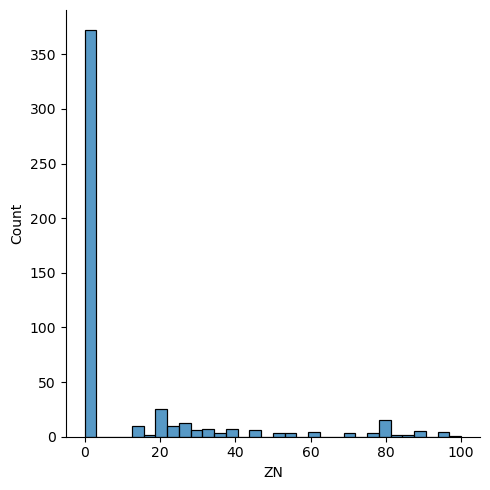

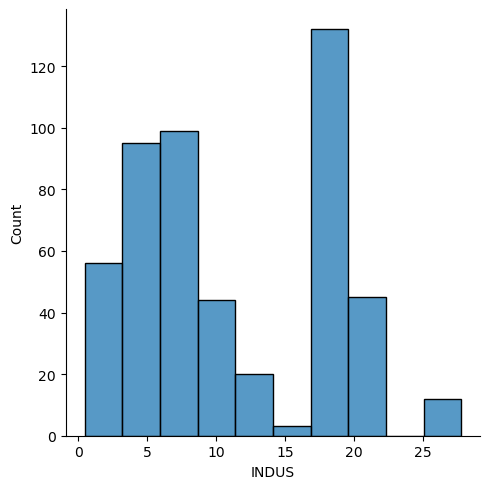

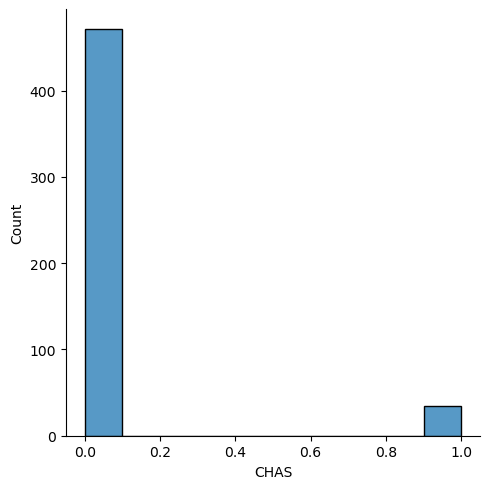

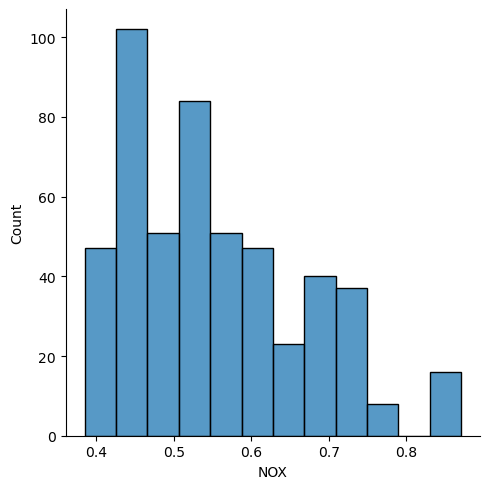

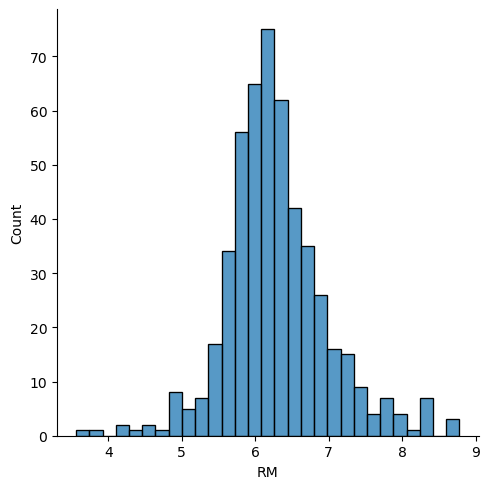

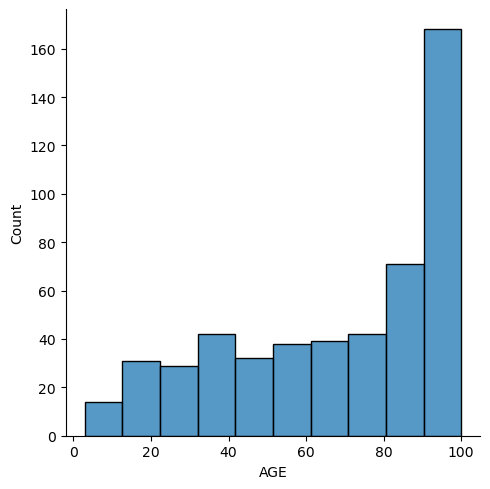

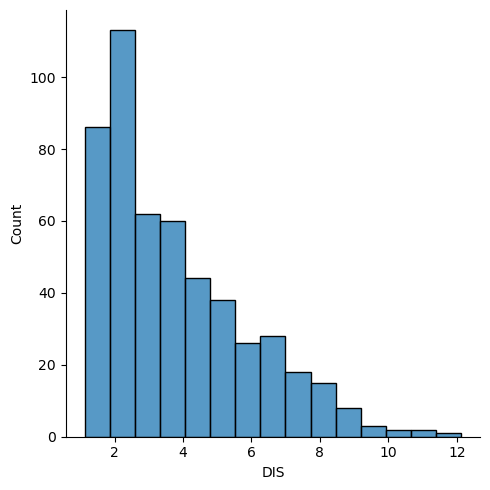

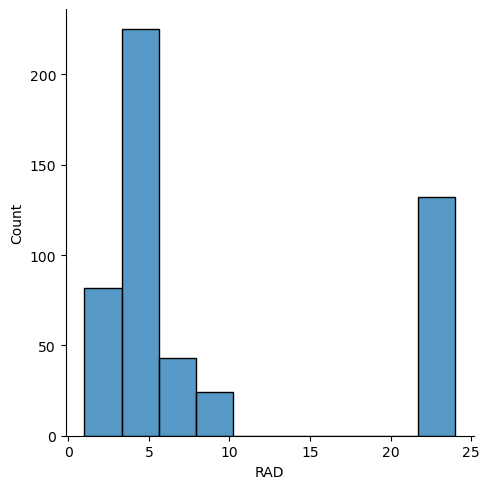

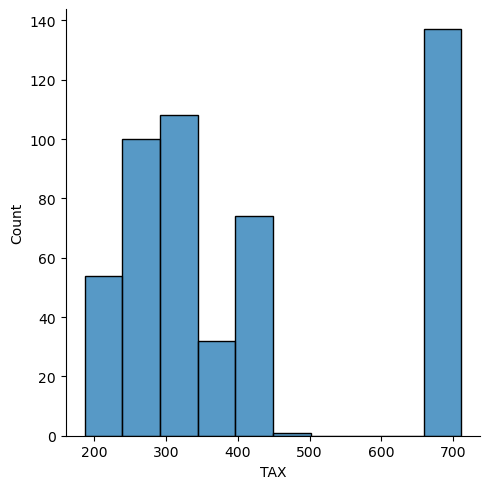

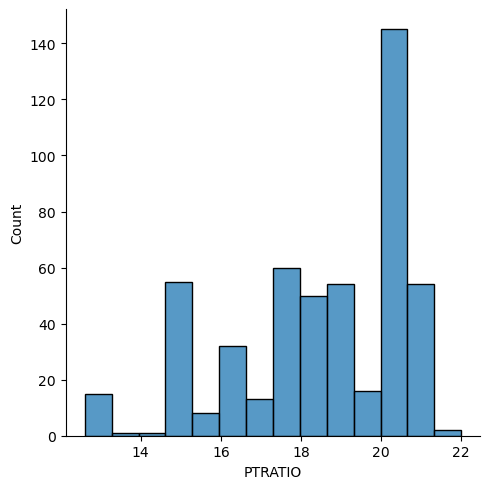

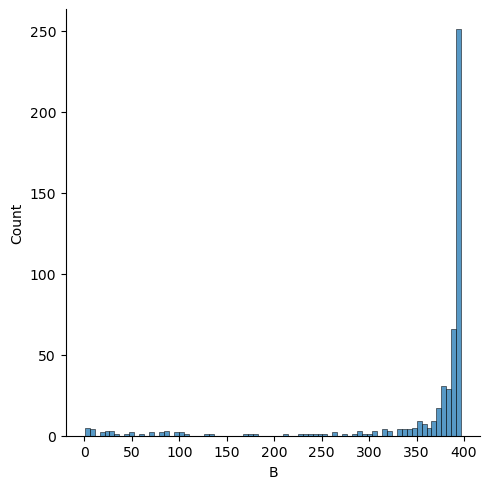

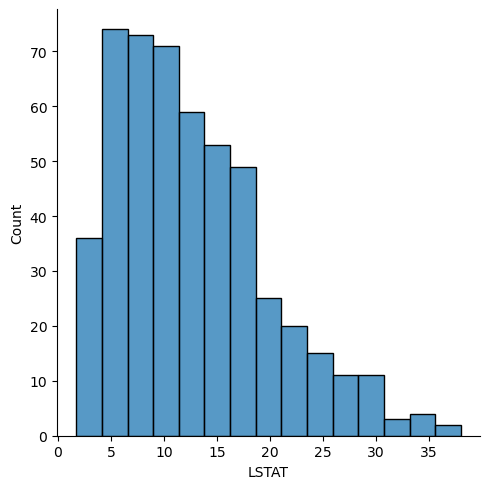

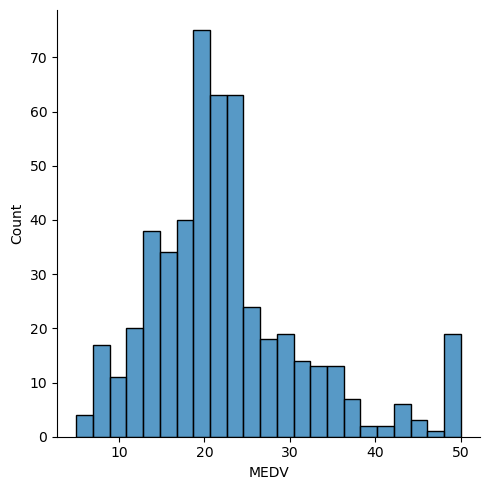

In [20]:
rows = 2
columns = 7
fig, ax = plt.subplots(nrows = rows, ncols = columns, figsize=(16,4))
col = df.columns
index = 0
for i in range(rows):
    for j in range(columns):
        sns.displot(df[col[index]], ax = ax[i][j])
        index = index+1 
        
plt.tight_layout()

**Correlation Matrix**

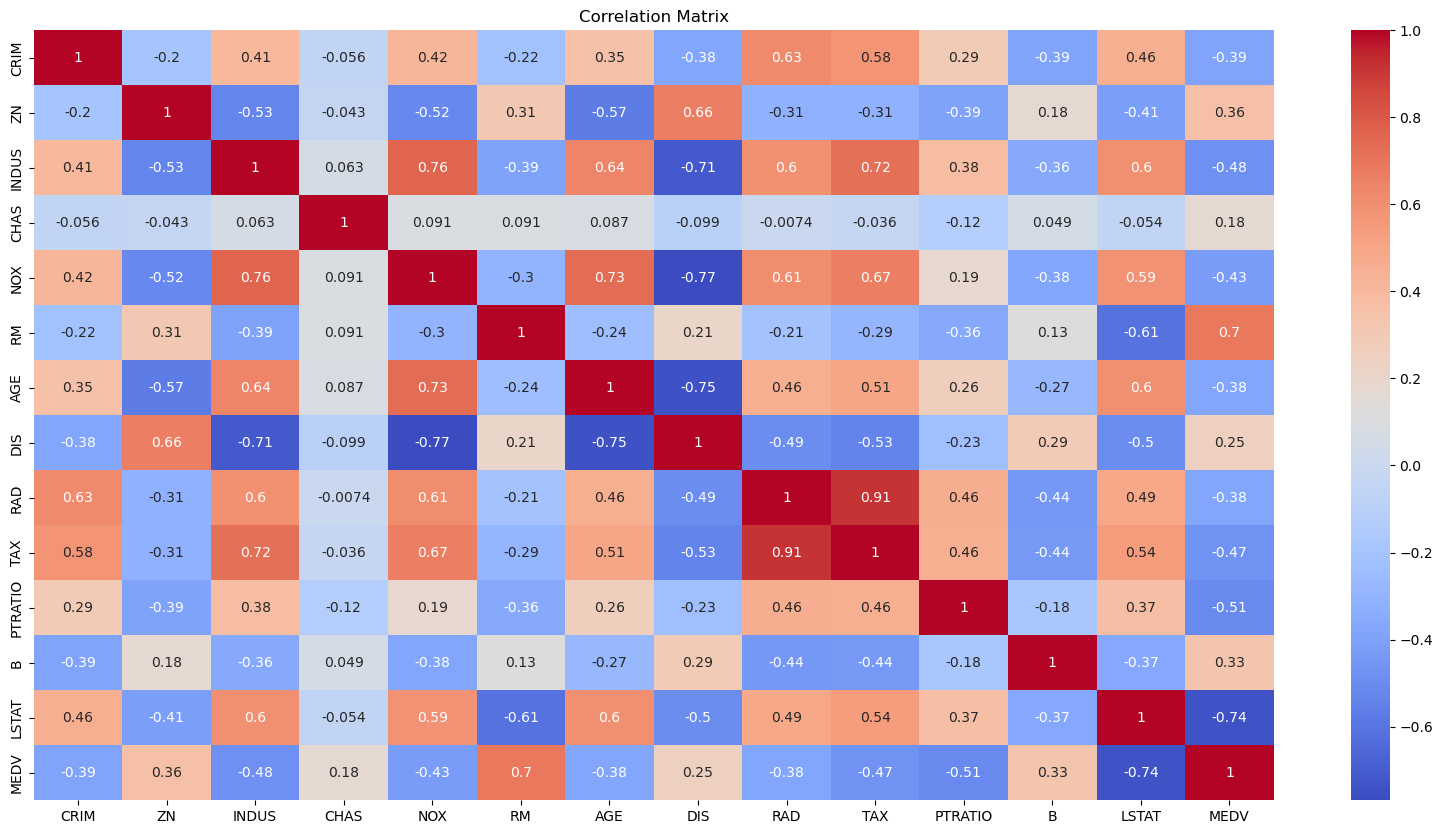

In [21]:
# Plotting and Visualisation of the heatmap of correlation between features
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

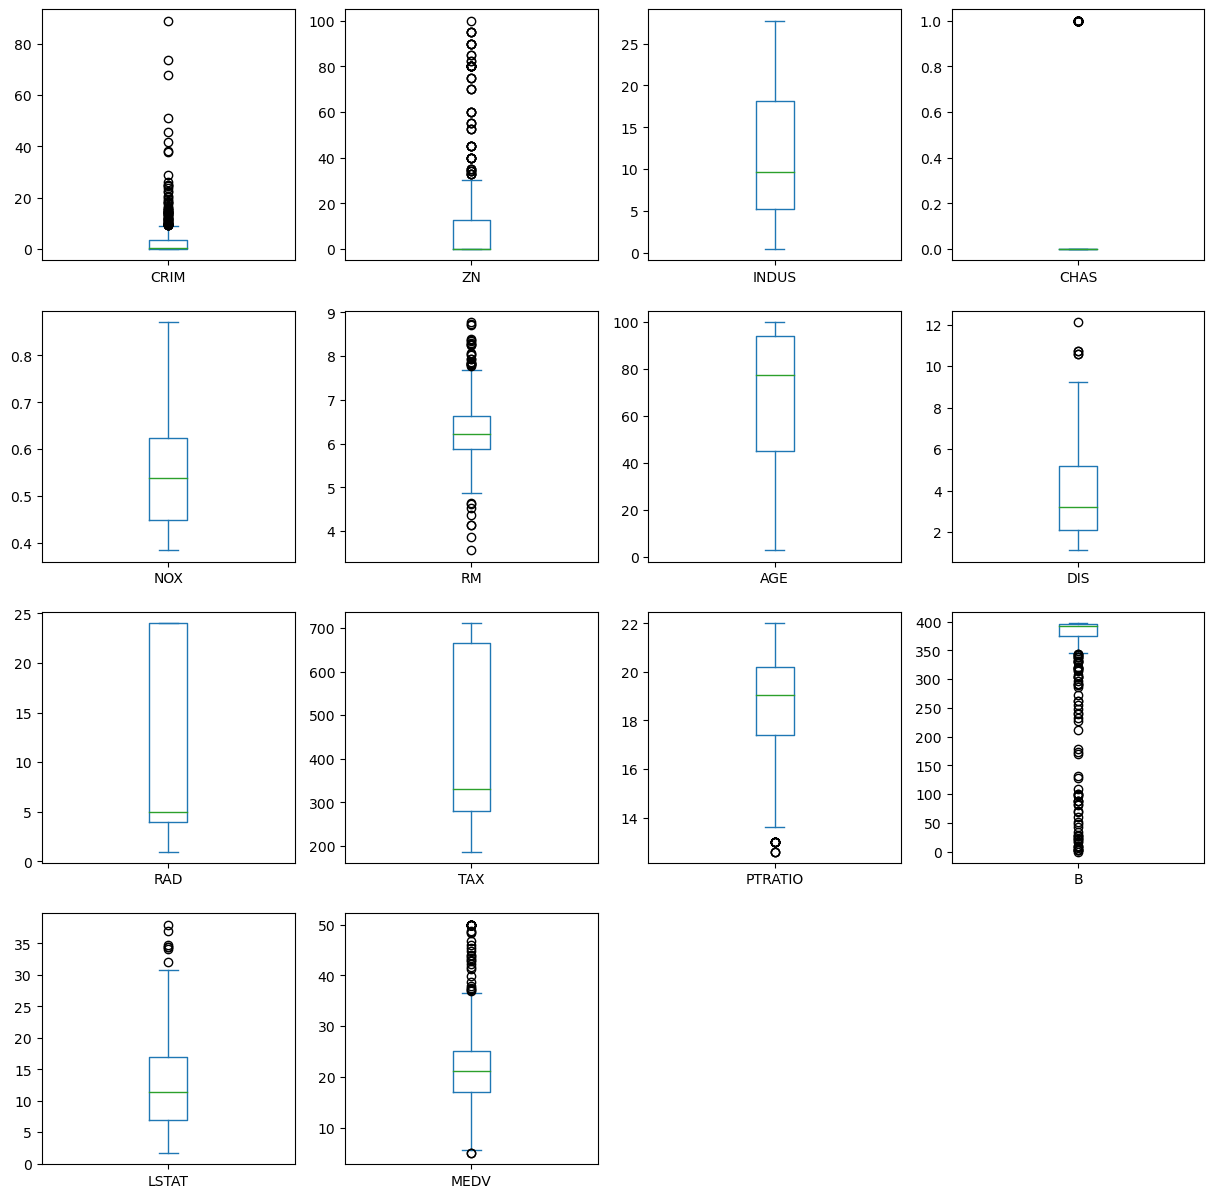

In [22]:
# Finding Outliers
def outlier_detect(DF):
    DF.plot(kind="box", subplots=True, layout=(4,4), figsize=(15,15));
outlier_detect(df)

**Scatter Plot**

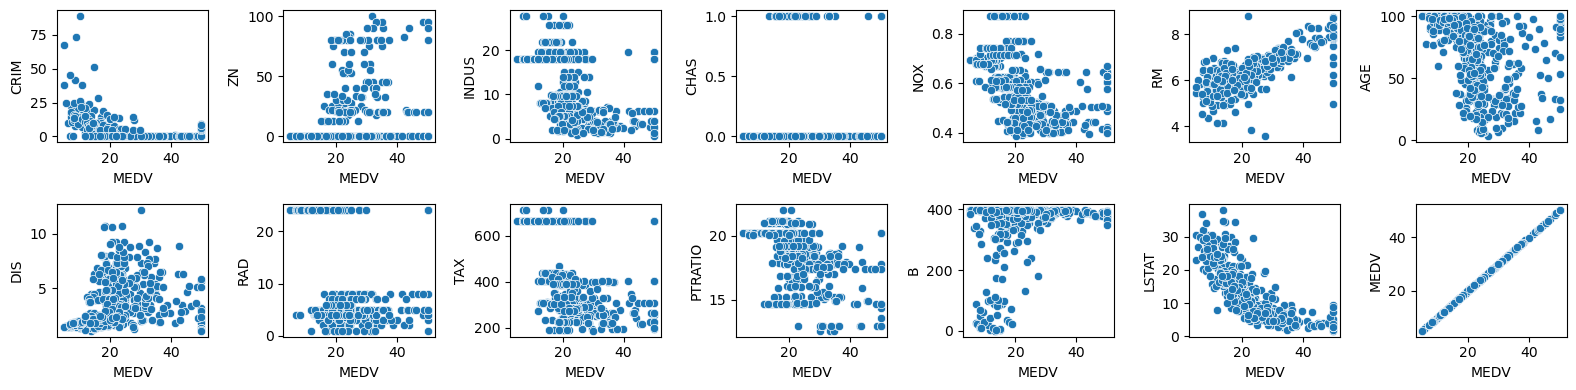

In [23]:
# Plotting MEDV with other columns
# If the no of rooms increase the price will also increase
rows = 2
cols = 7
fig, ax = plt.subplots(rows, cols, figsize=(16,4))
col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = 'MEDV', y =col[index], data = df, ax = ax[i][j])
        index = index+1 
        
plt.tight_layout() 


**Min-Max Normalization**

In [24]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

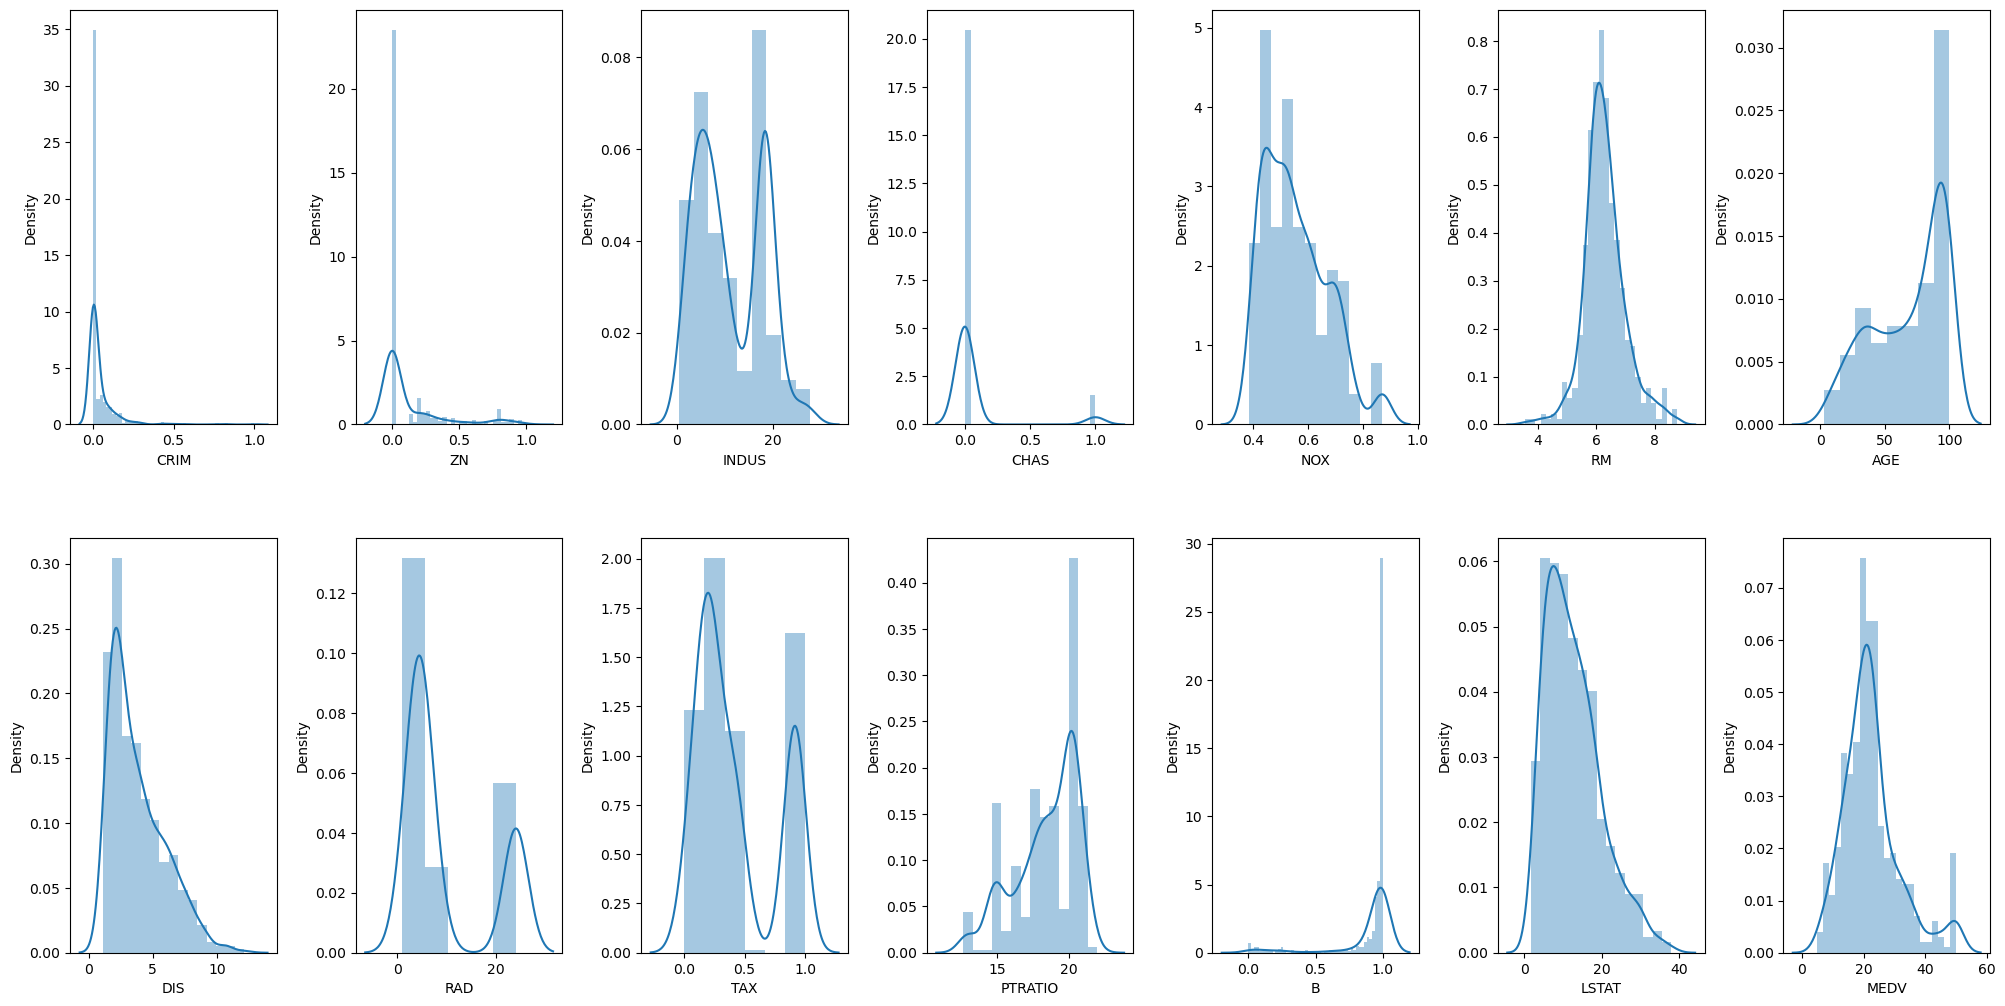

In [25]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [26]:
# Standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# Fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

CRIM        ZN       TAX         B
0 -0.419782  0.284830 -0.666608  0.441052
1 -0.417339 -0.487722 -0.987329  0.441052
2 -0.417342 -0.487722 -0.987329  0.396427
3 -0.416750 -0.487722 -1.106115  0.416163
4 -0.412482 -0.487722 -1.106115  0.441052

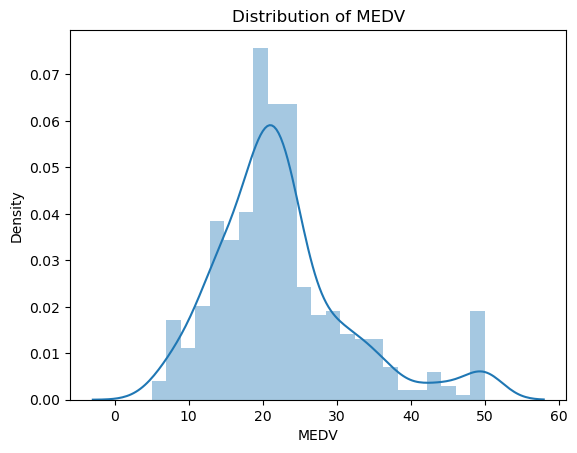

In [27]:
# Visualize the distribution of the target variable 'MEDV'
sns.distplot(df['MEDV'], kde=True)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Density')
plt.show()

In [28]:
df = df
df.sample(10)

CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD       TAX  \
415  0.203196  0.000  18.10     0  0.679  6.434  100.0  1.8347   24  0.914122   
210  0.001890  0.000  10.59     1  0.489  5.960   92.1  3.8771    4  0.171756   
485  0.041220  0.000  18.10     0  0.583  6.312   51.9  3.9917   24  0.914122   
59   0.001090  0.250   5.13     0  0.453  5.927   47.2  6.9320    8  0.185115   
223  0.006838  0.000   6.20     0  0.507  6.618   80.8  3.2721    8  0.229008   
54   0.000082  0.750   4.00     0  0.410  5.888   47.6  7.3197    3  0.538168   
405  0.763342  0.000  18.10     0  0.693  5.683  100.0  1.4254   24  0.914122   
201  0.000316  0.825   2.03     0  0.415  6.162   38.4  6.2700    2  0.307252   
482  0.064346  0.000  18.10     0  0.532  7.061   77.0  3.4106   24  0.914122   
32   0.015530  0.000   8.14     0  0.538  5.950   82.0  3.9900    4  0.229008   

     PTRATIO         B  LSTAT  MEDV  
415     20.2  0.067906  29.05   7.2  
210     18.6  0.990796  17.27  21.7  
485     20.2  0.979121  10.58  21.2  
59      19.7  1.000000   9.22  19.6  
223     17.4  1.000000   7.60  30.1  
54      21.1  1.000000  14.80  18.9  
405     20.2  0.969918  22.98   5.0  
201     14.7  0.992108   7.43  24.1  
482     20.2  0.995915   7.01  25.0  
32      21.0  0.585708  27.71  13.2

In [29]:
final_df = df
final_df.sample(10)

CRIM     ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD       TAX  \
381  0.178353  0.000  18.10     0  0.671  6.545  99.1  1.5192   24  0.914122   
337  0.000271  0.000   5.19     0  0.515  5.895  59.6  5.6150    5  0.070611   
287  0.000364  0.525   5.32     0  0.405  6.209  31.3  7.3172    6  0.202290   
67   0.000580  0.125   6.07     0  0.409  5.878  21.4  6.4980    4  0.301527   
129  0.009834  0.000  21.89     0  0.624  5.637  94.7  1.9799    4  0.477099   
227  0.004564  0.000   6.20     0  0.504  7.163  79.9  3.2157    8  0.229008   
81   0.000430  0.250   4.86     0  0.426  6.619  70.4  5.4007    4  0.179389   
339  0.000547  0.000   5.19     0  0.515  5.985  45.4  4.8122    5  0.070611   
109  0.002892  0.000   8.56     0  0.520  6.229  91.2  2.5451    5  0.375954   
308  0.005470  0.000   9.90     0  0.544  6.635  82.5  3.3175    4  0.223282   

     PTRATIO         B  LSTAT  MEDV  
381     20.2  1.000000  21.08  10.9  
337     20.2  0.994730  10.56  18.5  
287     16.6  1.000000   7.14  23.2  
67      18.9  0.998260   8.10  22.0  
129     21.2  1.000000  18.34  14.3  
227     17.4  0.937415   6.36  31.6  
81      19.0  0.996798   7.22  23.9  
339     20.2  1.000000   9.74  19.0  
109     20.9  0.985703  15.55  19.4  
308     18.4  1.000000   4.54  22.8

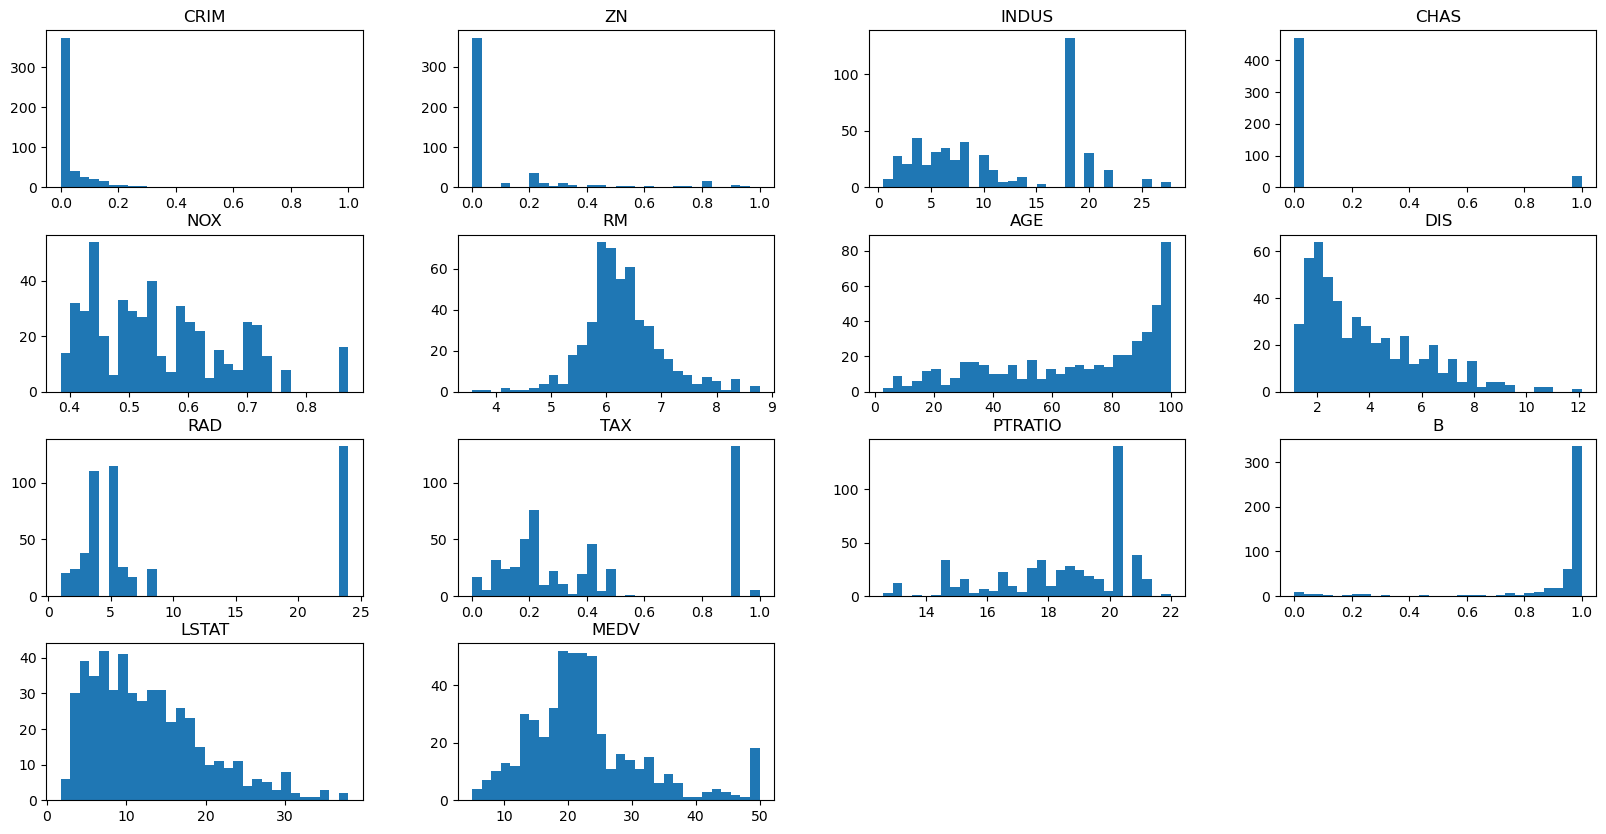

In [30]:
df.hist(bins=30,figsize=(20,10), grid=False);

In [31]:
categorical_var=df.drop(['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS',  'TAX',
       'PTRATIO', 'B', 'LSTAT'],axis=1)
continuous_var=df.drop([ 'CHAS', 'RAD'],axis=1)

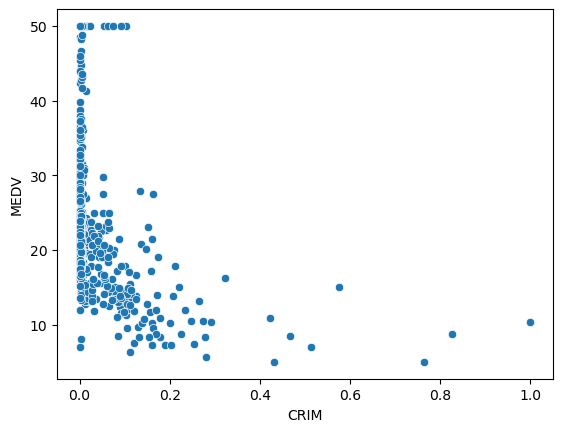

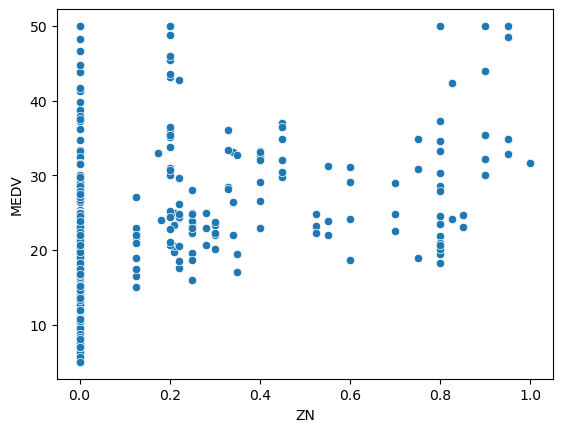

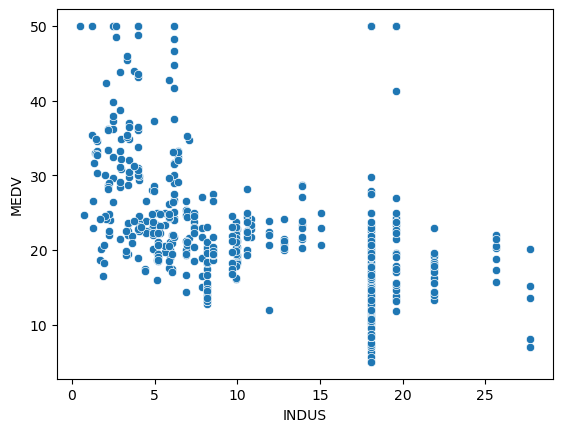

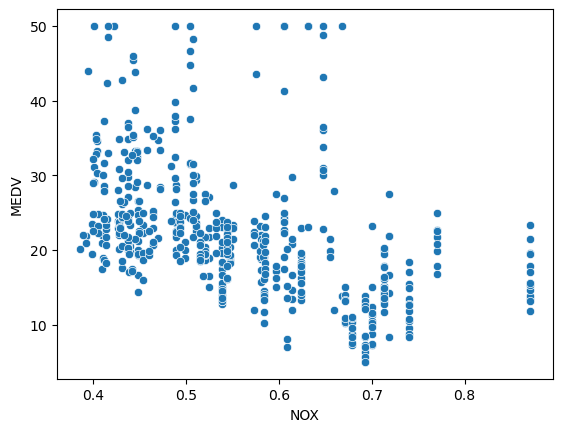

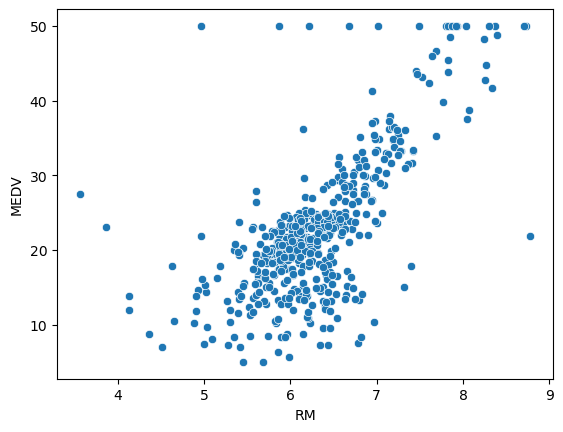

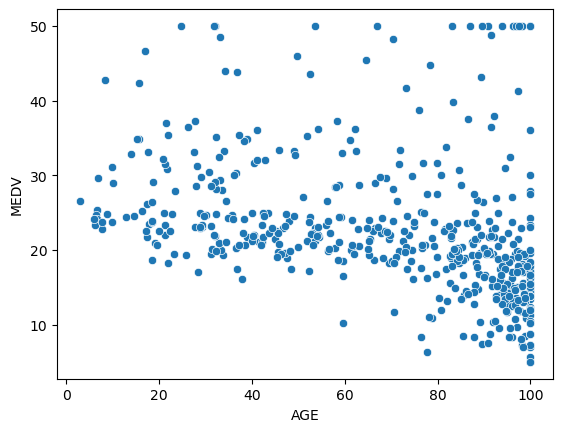

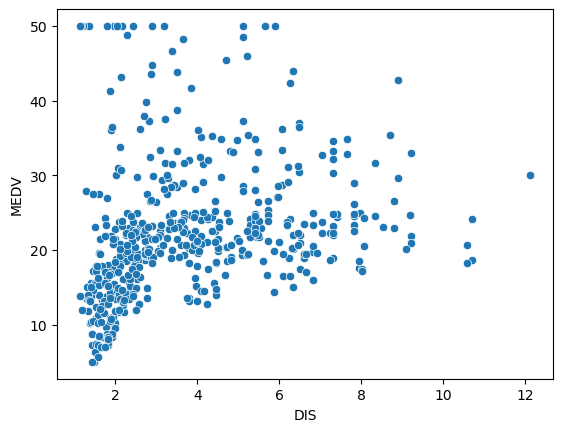

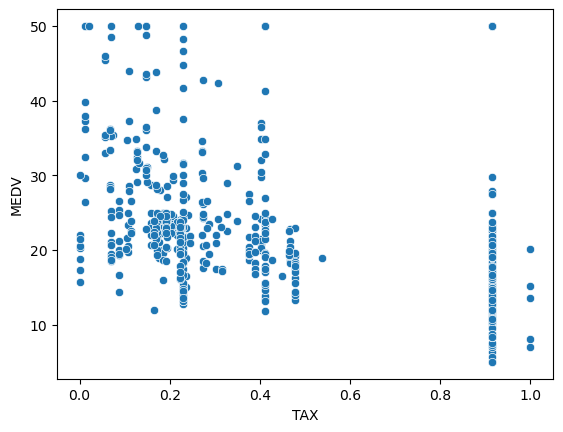

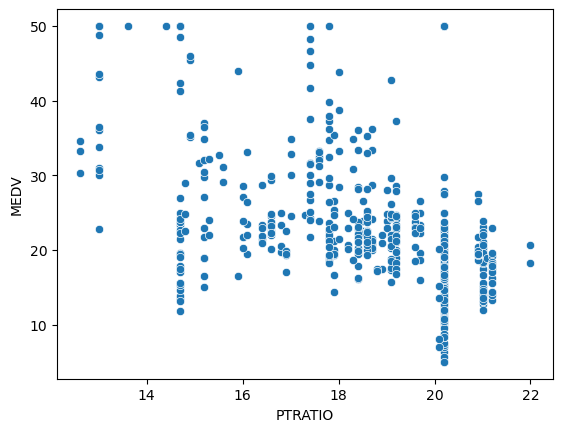

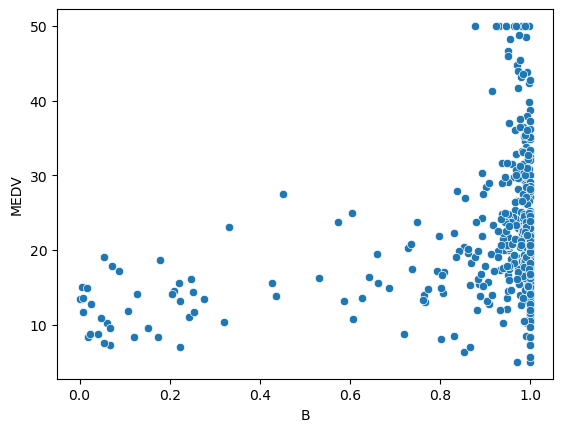

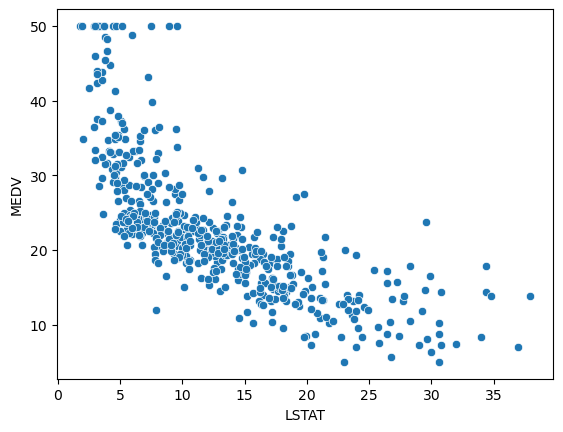

In [32]:
# Scatter Plot
for i in continuous_var:
    if i != 'MEDV':
        sns.scatterplot(x=i,y='MEDV',data=continuous_var)
        plt.show()

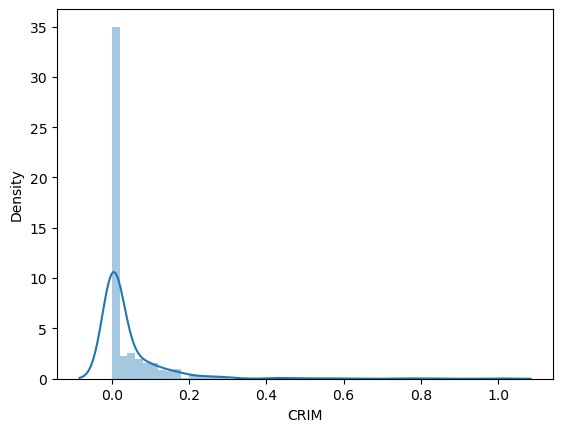

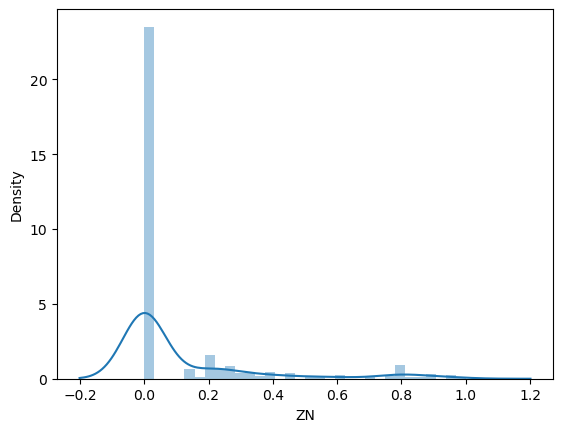

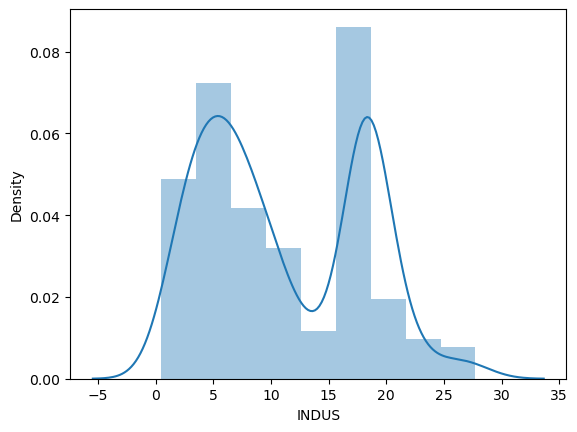

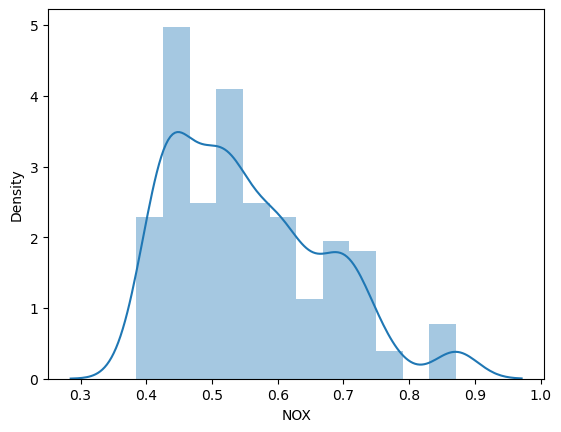

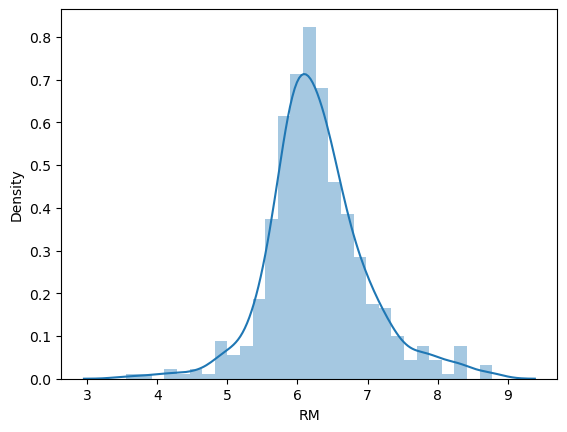

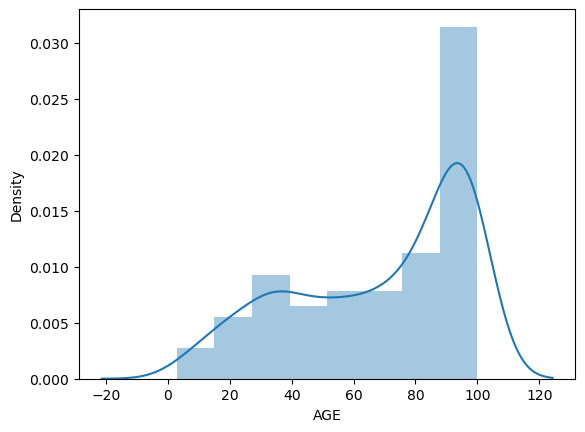

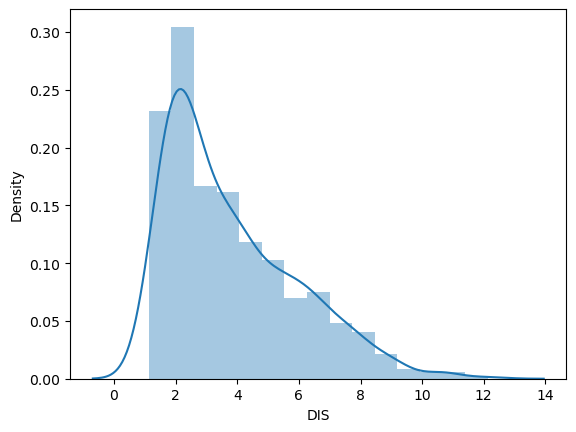

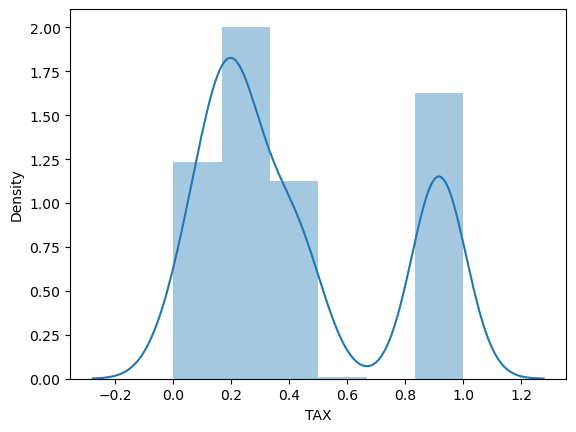

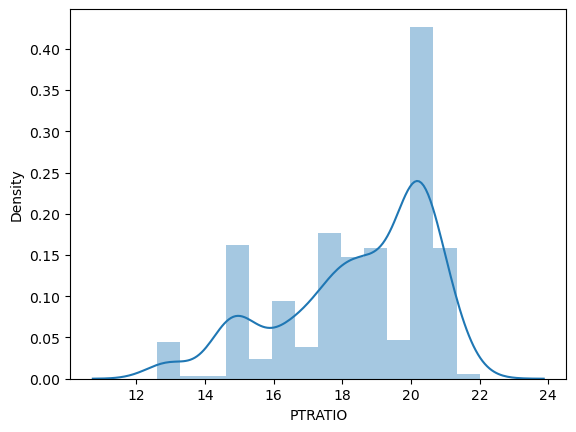

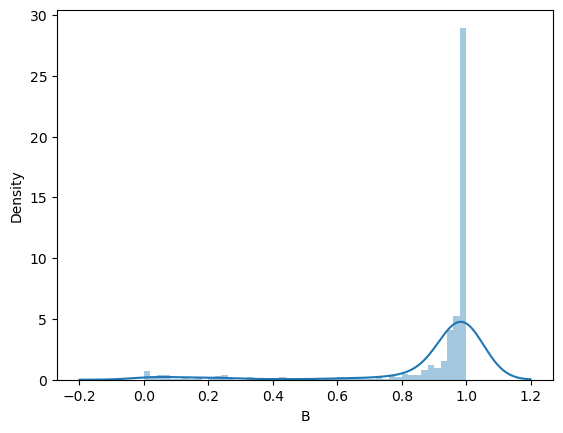

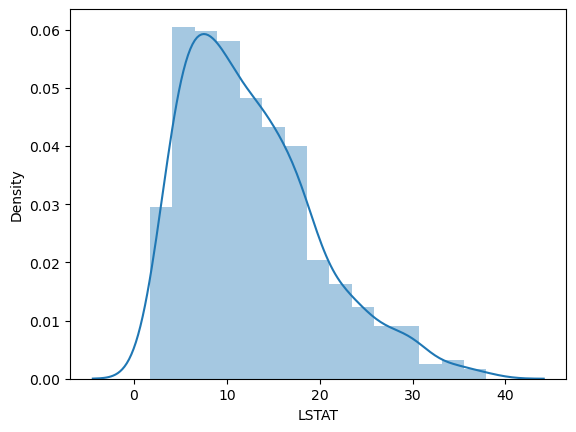

In [33]:
# Distribution Plot
for i in continuous_var:
    if i != 'MEDV':
        sns.distplot(continuous_var[i])
        plt.show()

In [34]:
#Target variable is medv. So we can’t able to get confusion so I just rename the feature name medv into Price.

df.rename(columns={'MEDV':'Price'}, inplace=True)

**Visualize distribution of all the continuous variables in the data using histograms**

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >]],
      dtype=object)

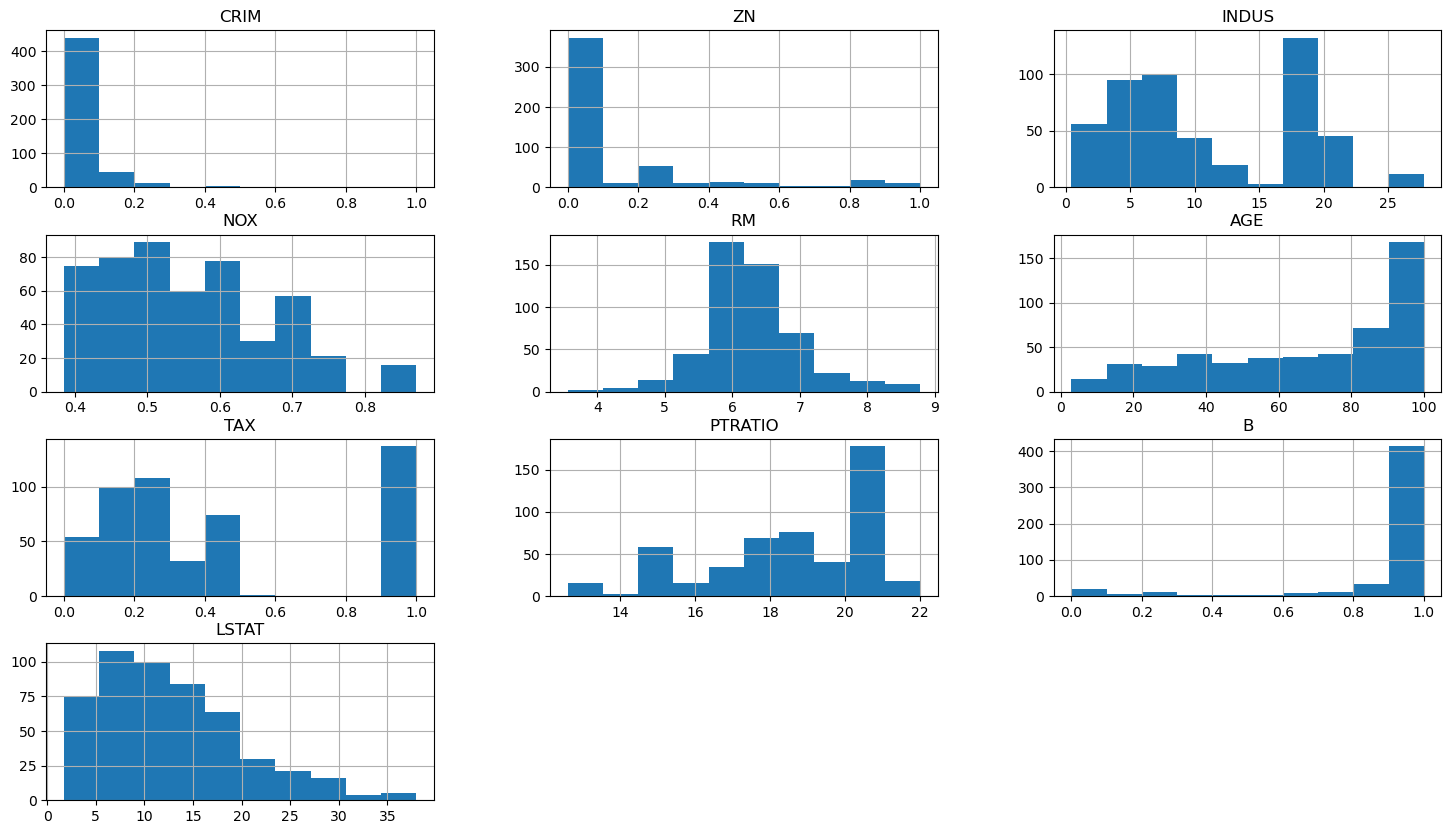

In [35]:
# Plotting histograms of Multiple Columns together
df.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

In [36]:
## Dividing the  dataset into independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
x.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD       TAX  \
0  0.000000  0.18   2.31     0  0.538  6.575  65.2  4.0900    1  0.208015   
1  0.000236  0.00   7.07     0  0.469  6.421  78.9  4.9671    2  0.104962   
2  0.000236  0.00   7.07     0  0.469  7.185  61.1  4.9671    2  0.104962   
3  0.000293  0.00   2.18     0  0.458  6.998  45.8  6.0622    3  0.066794   
4  0.000705  0.00   2.18     0  0.458  7.147  54.2  6.0622    3  0.066794   

   PTRATIO         B  LSTAT  
0     15.3  1.000000   4.98  
1     17.8  1.000000   9.14  
2     17.8  0.989737   4.03  
3     18.7  0.994276   2.94  
4     18.7  1.000000   5.33

In [38]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64